In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy

Populating the interactive namespace from numpy and matplotlib


Consider
$$ x''(t) = -\tanh(x(t)), \quad t \in (0, T), $$
with boundary conditions
$$x(0) = \alpha , \quad x(T) = \beta .$$

Can write as a first order system with
$$ x' = y, \quad y' = -\tanh(x).$$
There is a first integral
$$ \frac{1}{2}y^2 = -\log(\cosh(x)) + C$$

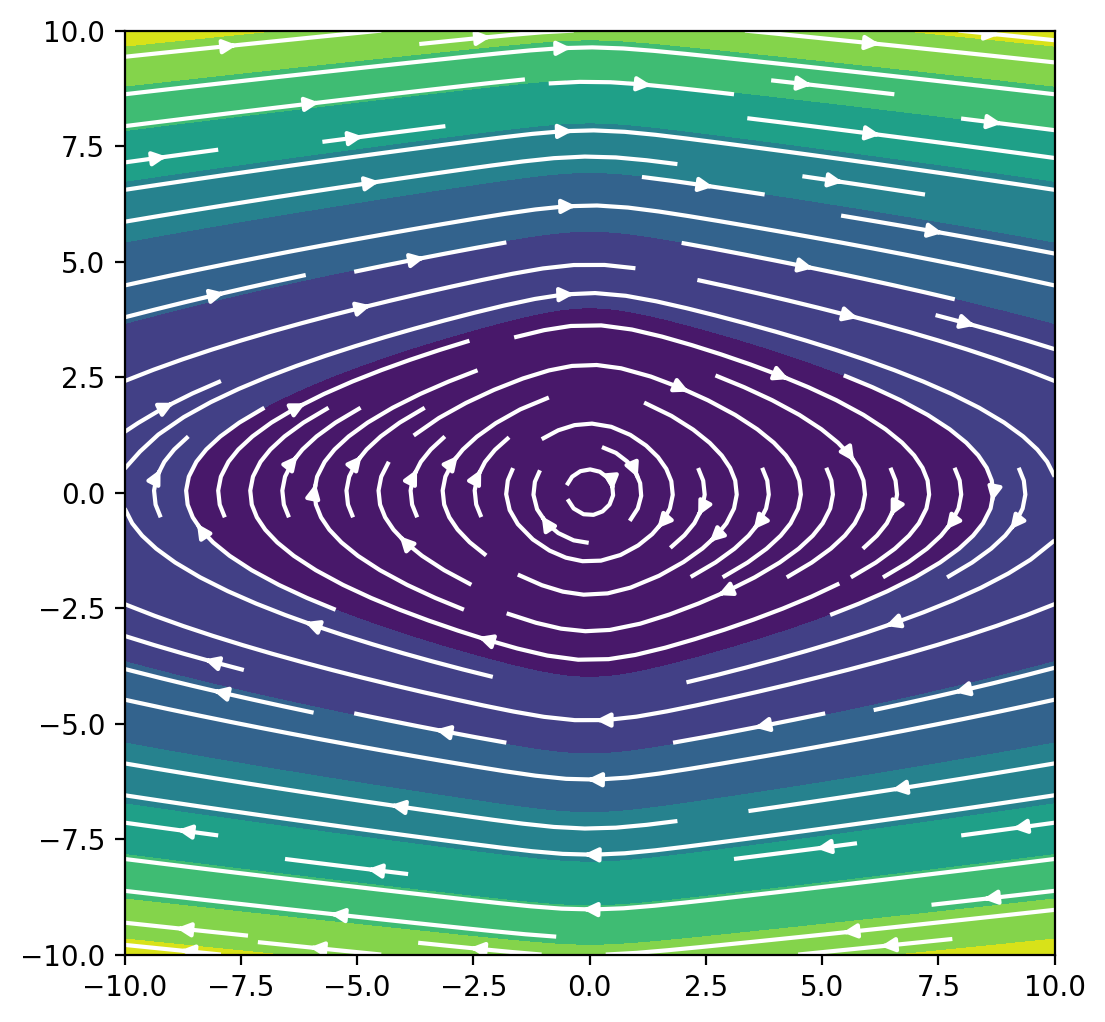

In [3]:
## x^2 + y^2 = r^2

X, Y = meshgrid(
    linspace(-10, 10, 100),
    linspace(-10, 10, 100))
F2 = -tanh(X)

figure(1, [6, 6])
streamplot(X, Y, Y, F2, color='w');
Z = 0.5*Y**2 + log(cosh(X))
contourf(X, Y, Z);

 Discretize the interval $(0, T)$ into $m+1$ subintervals of length $h = T/(m+1)>0$ and let $t_i = hi$, $x_i = x(t_i)$, $i=0,\ldots,m+1$. The discrete problem is
$$  \frac{1}{h^2}(x_{i-1} - 2x_i + x_{i+1}) + \tanh(x_i) = 0,$$
for $i=1,\ldots,m$.

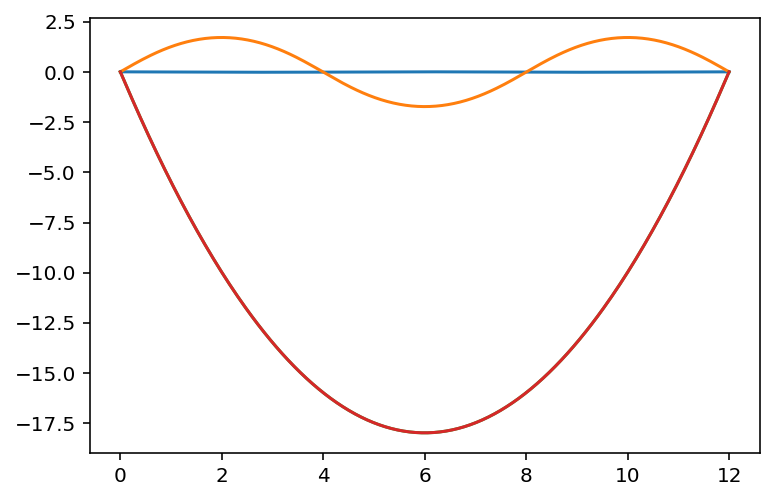

In [ ]:
m = 300
alpha = 0.01
beta = 0.01



def newton_solve(u0, tol, params, max_iter=500): ## tol should be O(h^2)
    alpha, beta, T = params
    h = T/(m+1)
    ufull = zeros((m+2))
    ufull[0] = alpha
    ufull[-1] = beta
    u = u0[1:-1].copy()
    A = 1/h**2*(
        diag(ones(m-1), -1)
        + diag(-2*ones(m), 0)
        + diag(ones(m-1), 1))
    b = zeros(m)
    b[0] = alpha/h**2
    b[-1] = beta/h**2
    for n in arange(max_iter):
        g = A@u + tanh(u) + b
        # assert np.all(cosh(u) != 0)
        J = A + diag((1/cosh(u))**2)
        du = -solve(J, g)
        u = u + du
        x_rel_err = absolute(du).max()/absolute(u).max()
        residual_err = absolute(g).max()
        if x_rel_err < tol:
            break
    ufull[1:-1] = u
    if n >= max_iter - 1:
        print('warning: max iterations reached without convergence')
    # print('err_sol =', absolute(du).max())
    # print('residual =', absolute(g).max())
    return ufull

t = linspace(0, T, m+2)

# u0 = linspace(alpha, beta, m+2)
# u = newton_solve(u0, 1e-12, (alpha, beta, h, T))
# plot(t, u)

u0 = .1*ones(m+2)
u = newton_solve(u0, 1e-12, (alpha, beta, T))
plot(t, u)

u0 = .8*ones(m+2)
u = newton_solve(u0, 1e-12, (alpha, beta, T))
plot(t, u)

u0 = 1.4*ones(m+2)
u = newton_solve(u0, 1e-12, (alpha, beta, T))
plot(t, u)

u0 = 1.6*ones(m+2)
u = newton_solve(u0, 1e-12, (alpha, beta, T))
plot(t, u);

# This next figure is interactive, and you can see how difficult it is to get all of the solutions

In [ ]:
import warnings
warnings.filterwarnings('ignore')

@interact(T=(1., 50., 1.))
def plot_fn(T=1.):
    figure(1, [6, 4])
    a = log(1 + T)*(linspace(-1., 1., 14))
    _u0 = ones(m+2)#linspace(-1, 1, m+2)
    for aj in a:
        u0 = aj*_u0
        u = newton_solve(u0, 1e-8, (alpha, beta, T))
        plot(t, u)


interactive(children=(FloatSlider(value=1.0, description='T', max=50.0, min=1.0, step=1.0), Output()), _dom_cl…